In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
sess = tf.Session()


In [45]:
(x_vals, y_vals) = datasets.make_circles(n_samples=500, factor=.5,
                                         noise=.1)
y_vals = np.array([1 if y == 1 else -1 for y in y_vals])
class1_x = [x[0] for i,x in enumerate(x_vals) if y_vals[i] == 1]
class1_y = [x[1] for i,x in enumerate(x_vals) if y_vals[i] == 1]
class2_x = [x[0] for i,x in enumerate(x_vals) if y_vals[i] == -1]
class2_y = [x[1] for i,x in enumerate(x_vals) if y_vals[i] == -1]

In [46]:
batch_size = 250
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
prediction_grid = tf.placeholder(shape=[None, 2], dtype=tf.float32)
b = tf.Variable(tf.random_normal(shape=[1, batch_size]))

In [47]:
gamma = tf.constant(-50.0)
dist = tf.reduce_sum(tf.square(x_data), 1)
dist = tf.reshape(dist, [-1, 1])
sq_dists = tf.add(tf.subtract(dist, tf.multiply(2., tf.matmul(x_data, tf.transpose(x_data)))), tf.transpose(dist))
my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_dists)))

In [48]:
model_output = tf.matmul(b, my_kernel)
first_term = tf.reduce_sum(b)
b_vec_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = tf.matmul(y_target, tf.transpose(y_target))
second_term = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vec_cross,
                                                               y_target_cross)))
loss = tf.negative(tf.subtract(first_term, second_term))



In [49]:
rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1), [-1, 1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid), 1), [-1, 1])
pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2., tf.matmul(x_data,
                tf.transpose(prediction_grid)))), tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))
prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target), b),pred_kernel)
prediction = tf.sign(prediction_output - tf.reduce_mean(prediction_output))
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction), tf.squeeze(y_target)),
                                  tf.float32))



In [50]:
my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)



In [51]:
loss_vec = []
batch_accuracy = []
for i in range(500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={
        x_data: rand_x,
        y_target: rand_y
    })
    temp_loss = sess.run(loss, feed_dict={
        x_data: rand_x,
        y_target: rand_y
    })
    loss_vec.append(temp_loss)
    acc_temp = sess.run(accuracy, feed_dict={
        x_data: rand_x,
        y_target: rand_y,
        prediction_grid: rand_x
    })
    batch_accuracy.append(acc_temp)
    if((i + 1) % 100 == 0):
        print('Step #' + str(i+1))
        print('Loss = ' + str(temp_loss))



Step #100
Loss = 135.28973
Step #200
Loss = 71.43237
Step #300
Loss = 65.42114
Step #400
Loss = 30.313519
Step #500
Loss = 19.28875


In [52]:
x_min, x_max = x_vals[:, 0].min() - 1, x_vals[:, 0].max() + 1
y_min, y_max = x_vals[:, 1].min() - 1, x_vals[:, 0].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
grid_points = np.c_[xx.ravel(), yy.ravel()]
[grid_predictions] = sess.run(prediction, feed_dict={
    x_data: rand_x, 
    y_target: rand_y,
    prediction_grid:grid_points
})
grid_predictions = grid_predictions.reshape(xx.shape)


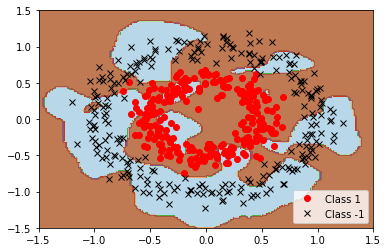

In [43]:
plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.Paired, alpha=0.8)
plt.plot(class1_x, class1_y, 'ro', label='Class 1')
plt.plot(class2_x, class2_y, 'kx', label='Class -1')
plt.legend(loc='lower right')
plt.ylim([-1.5, 1.5])
plt.xlim([-1.5, 1.5])
plt.show()



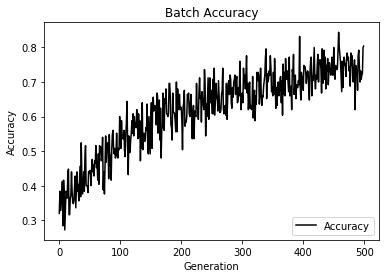

In [54]:
plt.plot(batch_accuracy, 'k-', label='Accuracy')
plt.title('Batch Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


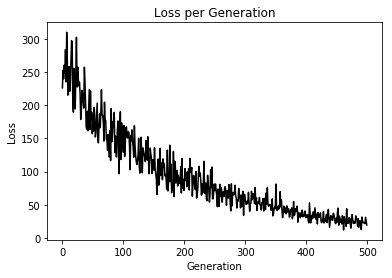

In [55]:
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()